<a href="https://colab.research.google.com/github/JissmonJoshy/DataScience/blob/main/Jissmon_Support_Vector_Machines_MNIST_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Loading Data

Let's load both the training and the test datasets.



Train Dataset:https://raw.githubusercontent.com/akshayr89/MNSIST_Handwritten_Digit_Recognition-SVM/master/train.csv

Test Dataset:https://raw.githubusercontent.com/akshayr89/MNSIST_Handwritten_Digit_Recognition-SVM/master/test.csv


MNIST Train & test dataset is uploaded in google classroom also.


**Dataset credits:** http://yann.lecun.com/exdb/mnist/

Now, get the information on both data frames.

In [ ]:
#Load train & test dataset
import numpy as np
import pandas as pd
train_df=pd.read_csv("https://raw.githubusercontent.com/akshayr89/MNSIST_Handwritten_Digit_Recognition-SVM/master/train.csv")
test_df=pd.read_csv("https://raw.githubusercontent.com/akshayr89/MNSIST_Handwritten_Digit_Recognition-SVM/master/test.csv")


In [ ]:
# Get the information on the train dataset.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


There are 42000 rows and 785 columns in the training dataset.

In [ ]:
# Get the information on the test dataset.
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


There are 28000 rows and 784 columns in the test dataset. This means we don't have the labels column for the test set.

In [ ]:
# Print the first and last five columns of both the test and train datasets.
train_df.head(5)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As you can see, the train set has the `label` column but the test set doesn't.

Now, let's print the first five rows of the data frame containing the train set.

In [ ]:
# Print the first ten rows of the data frame containing the train set.
train_df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As you can see:

- The first row contains the pixel values of the image of the handwritten digit $1$.

- Similarly, the second row contains the pixel values of the image of the handwritten digit $0$.

- Similarly, the third row contains the pixel values of the image of the handwritten digit $1$.


$$\vdots$$

- The $10^{\text{th}}$ row contains the pixel values of the image of the handwritten digit $3$.

Let's print the image of the digit $4$.


---

#### The `matplotlib.pyplot.imshow()` Function

To display an image from its pixel values, you can use the `imshow()` function of the `matplotlib.pyplot` module. So, to create the image of the digit 4 from its pixel values, we will follow the steps given below:

1. Create a 1D array containing the pixel values from the training data frame for the image and store it in a variable.

2. Then reshape the above array into a 2D array having 28 rows and 28 columns.

3. Use the `imshow()` function of the `matplotlib.pyplot` module and pass the following inputs to the function:
   - The $28 \times 28$ array containing the pixel values of an image
   
   - The colour mapping value for the image. We will create a grayscale image hence, we will set the colormapping value using the parameters `cmap = 'gray', vmin = 0, vmax = 255`.

   **Note:** There are other parameters that can be passed to `imshow()` function as inputs. But for now, we will pass the above parameters only.

4. Provide the title to the image.



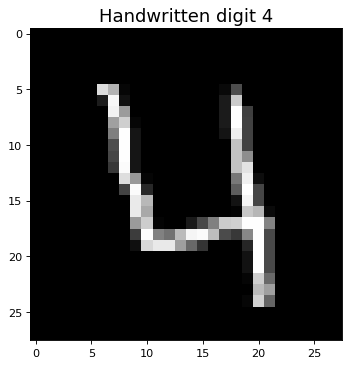

In [ ]:
# Display the image of the handwritten digit 4 from the train data frame.
import matplotlib.pyplot as plt

four_pixels=train_df.iloc[3,1:]
four_pixels=four_pixels.values.reshape(28,28)
plt.figure(figsize=(5,5),dpi=81)
plt.title("Handwritten digit 4",fontsize=16)
plt.imshow(four_pixels,cmap='gray',vmin=0,vmax=255)
plt.show()

In the above code:

- `four_pixels = train_df.iloc[3, 1:]` part gets the pixel values of the image of the digit 4 that are stored in the $4^{\text{th}}$ row of the data frame.

- `four_pixels = four_pixels.values.reshape(28, 28)` part first gets the pixel values from the Pandas series in the form of a NumPy array and then reshapes the 1D array into a 2D array having 28 rows and 28 columns.

- `plt.figure(figsize = (5, 5), dpi = 81)` part sets the figure size.

- `plt.title("Handwritten Digit 4", fontsize = 16)` part sets the title of the plot.

- `plt.imshow(four_pixels, cmap = 'gray', vmin = 0, vmax = 255)` part creates a 2D image in gray colour.

If you look at the axes of the above image, you can see that nearly the first four and last three rows are blank. Similarly, the first five and last five columns are blank which is denoted by the black colour. So let's print the rows 5 to 26 and columns 5 to 25 of the `four_pixel` NumPy array to see the pixel values of the image of the handwritten digit 4.

In [ ]:
# Print the rows 5 to 26 and columns 5 to 23 of the 'four_pixel' NumPy array to see the pixel values of the image of the handwritten digit 4.
print(four_pixels[5:26,5:23])

[[  0 220 179   6   0   0   0   0   0   0   0   0   9  77   0   0   0   0]
 [  0  28 247  17   0   0   0   0   0   0   0   0  27 202   0   0   0   0]
 [  0   0 242 155   0   0   0   0   0   0   0   0  27 254  63   0   0   0]
 [  0   0 160 207   6   0   0   0   0   0   0   0  27 254  65   0   0   0]
 [  0   0 127 254  21   0   0   0   0   0   0   0  20 239  65   0   0   0]
 [  0   0  77 254  21   0   0   0   0   0   0   0   0 195  65   0   0   0]
 [  0   0  70 254  21   0   0   0   0   0   0   0   0 195 142   0   0   0]
 [  0   0  56 251  21   0   0   0   0   0   0   0   0 195 227   0   0   0]
 [  0   0   0 222 153   5   0   0   0   0   0   0   0 120 240  13   0   0]
 [  0   0   0  67 251  40   0   0   0   0   0   0   0  94 255  69   0   0]
 [  0   0   0   0 234 184   0   0   0   0   0   0   0  19 245  69   0   0]
 [  0   0   0   0 234 169   0   0   0   0   0   0   0   3 199 182  10   0]
 [  0   0   0   0 154 205   4   0   0  26  72 128 203 208 254 254 131   0]
 [  0   0   0   0  61 254

From the above output, you can see the non-zero pixel values arranged in the pattern of digit 4.

**It is to be noted that the pixel values for a grayscale image range from 0 to 255.**

You can also look at the descriptive statistics for the first 10 images in the train data frame.

---


In [ ]:
# Create a data frame from the training data frame that contain the pixel values of the images of the digit 6.
six_pixels=train_df.iloc[21,1:]
six_pixels=six_pixels.values.reshape(28,28)
print(train_df.head())


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

Now, from the above data frame, let's create an image of the first instance of the image of digit $6$. Its index is 21.

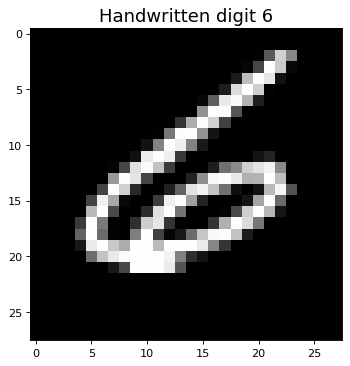

In [ ]:
# Create an image from the pixel values of the image of the digit 6 that are stored in row 21.
plt.figure(figsize=(5,5),dpi=81)
plt.title("Handwritten digit 6",fontsize=16)
plt.imshow(six_pixels,cmap='gray',vmin=0,vmax=255)
plt.show()

Now, let's print the part of the array containing the pixel values of the above image such that their arrangement resembles the digit 6.

In [ ]:
# S3.8: Print the rows 2 to 22 and columns 5 to 21 of the 'six_pixels' array.
print(six_pixels[2:22,5:21])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   5  70]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  27 189 254]
 [  0   0   0   0   0   0   0   0   0   0   0   0  28 219 255 206]
 [  0   0   0   0   0   0   0   0   0   0   8  94 233 248 179  31]
 [  0   0   0   0   0   0   0   0   0   0 146 254 251  84   0   0]
 [  0   0   0   0   0   0   0   0  51 173 252 209  65   0   0   0]
 [  0   0   0   0   0   0   2 119 252 254 146  20   0   0   0   0]
 [  0   0   0   0   0  18 131 254 239 130  25   0   0   0   0   0]
 [  0   0   0   0  17 237 254 239  58   0   0   0   0   0   0  20]
 [  0   0   4  70 223 251 196  61   0   0   0  30 112 138 207 226]
 [  0   0 153 254 228  68   0   0   0  34 143 249 254 233 177 179]
 [  0  67 253 208  40   0   0  31  99 226 241 195 112  14   0  18]
 [ 67 241 168   8   0   0  60 239 253 161  37   0   0   0  20 165]
 [185 254  74   0   0  43 224 254 116   0   0   0   3  73 205 

Now, for a machine learning algorithm (in this case, SVM), to correctly identify an image for a digit, it has to figure out the arrangement of pixel values for a digit on a 2D grid (in this case, $28 \times 28$ grid).

Knowing this, we can now build a machine learning model (in this case, SVM) to classify the images of different handwritten digits.


---

#### Check for Data Imbalance

Before building a classification model, let's check whether the training dataset is imbalanced or not.

In [ ]:
# Find out the counts of records for each digit in the training dataset.

train_df['label'].value_counts()


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

**Note:**

1. The `dropna = False` parameter counts the number of `NA` or `null` values if they are present in a Pandas series.

2. The `normalize = True` parameter calculates the count of a value as the fraction of the total number of records.

From the count of labels, we can see that the training dataset is balanced. Hence, we can now proceed to build a classification model.

---

#### Activity 1: Feature Scaling or Normalisation

Now that we have ensured that there is no data imbalance, let's scale down the pixel values of each image because the support vector machines is sensitive to the numeric data. Also, in the case of large values, the time taken to train an SVM model will be high.  

So let's divide each pixel value for each image by 255 (the greatest pixel value for a grayscale image) to reduce the values between 0 and 1.



In [ ]:
# Create features and target data frames and divide each pixel for each image by 255.0


#### Activity 2: Model Building^

Let's build a preliminary SVM classification model to classify the images of digits.

**Note:** Since there are 42000 training samples (or image samples or rows), the SVC model will take some time (about 4 to 6 minutes) to train.



In [ ]:
#Build an SVC model with the linear kernel.


Now that we have built a classification model using support vector machines, let's get the predicted digts and them compare the predicted values with the actual values.

**Note:** The code below may take 3 to 5 minutes to execute.

In [ ]:
#  Predict the target values for the training set.


Now let's create a confusion matrix to check for misclassification.

In [ ]:
# Create a confusion matrix to check for misclassification.


In [ ]:
#Print the precision, recall and f1-score values to further evaluate the efficacy of the model.


The f1-scores for all the labels (or digits) are almost equal to 1. This implies that the SVC model built to classify digits is very accurate. So now let's predict the digits on the test set.

---

#### Activity 3: Prediction on Test Set^^

We already know that the test set does not have a label column. So don't need to separate the features and target variables. But we do need to normalise the features in the test set as well with the same technique used for the train set. Hence, we will divide each pixel value in the test set by 255.



In [ ]:
# Divide each pixel value in the test set by 255. Also, for each image pixels, print the minimum and maximum pixel values.


Now let's predict the digits for the test set using the SVC model that we just built.

**Note:** The code below may take 3 to 5 minutes to execute.

In [ ]:
# Predict the digits for the test set using the SVC model built above.


Now let's get the count of the predicted labels (or handwritten digits) to see their distribution.

In [ ]:
# Get the count of the predicted labels (or handwritten digits) to see their distribution.


It seems that the handwritten digits in the test set are quite uniformly distributed.

---

#### Activity 4: Visualising Digits^^^

Let's now visualise at least one-one sample from each digit. But first, let's add a new column called `label` to the `test_df` data frame so that its values are the predicted labels (or digits). Make sure that the column is added to the column index = 0 location.

In [ ]:
#  Add 'label' at column index = 0 to the 'test_df' data frame so that its values are the predicted labels (or digits).


Lets's display the first 5 rows of the modified `test_df` data frame.

In [ ]:
# Display the first 5 rows of the modified 'test_df' data frame.


Now let's group all the rows of the `test_df` data frame by the `label` column so that pixel values of images of a digit can be clubbed together and a sample of a digit can be retrieved easily later.

Eg., you can easily retrieve one of the sample images of digit 0 from a data frame containing pixel values of all the image samples of the digit 0 only.

In [ ]:
#  Group all the rows of the 'test_df' data frame by the 'label' column. Also, get a data frame containing pixel values of images of digit 0.
grouped_test_df = test_df.groupby(by = "label")
zeros_test_df = grouped_test_df.get_group(0)
zeros_test_df

Now, let's create an image from the pixel values of one of the samples of digit 0.

In [ ]:
#  Create an image from the pixel values of one of the samples of digit 0.
sample_of_zero_test_pixels = test_df.iloc[6, 1:].values.reshape(28, 28)

plt.figure(figsize = (6, 6), dpi = 81)
plt.title("Handwritten Digit 0 Image", fontsize = 16)
plt.imshow(sample_of_zero_test_pixels, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

NameError: ignored

Indeed the predicted image is 0. Let's create an image of one of the sample images of digit three.

In [ ]:
# Get a data frame containing pixel values of all images of digit 3 from 'grouped_test_df' data frame.




Now, let's create an image of one of the sample images of digit 3.

In [ ]:
# Create an image of one of the sample images of digit 3.
